### Bank Products Recommender System

![Bank Recommendation System](../images/santander_logo.png)

This project is based on the Kaggle's competition from 2016 organized by Santander. In this competition, the participants are asked to recommend bank products to clients based on their 1.5 history purchase of products from the bank. For further information, visit [Santander Product Recommendation Competition](https://www.kaggle.com/competitions/santander-product-recommendation/overview).


The features contained in the datset are the following:

- **fecha_dato**: The table is partitioned for this column
- **ncodpers**: Customer code
- **ind_empleado**: Employee index: A active, B ex-employed, F filial, N not employee, P passive
- **pais_residencia**: Customer's country of residence
- **sexo**: Customer's sex
- **age**: Age
- **fecha_alta**: The date in which the customer became the first holder of a contract in the bank
- **ind_nuevo**: New customer index. 1 if the customer registered in the last 6 months.
- **antiguedad**: Customer seniority (in months)
- **indrel**: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
- **ult_fec_cli_1t**: Last date as primary customer (if not at the end of the month)
- **indrel_1mes**: Customer type at the beginning of the month: 1 (First/Primary customer), 2 (co-owner), P (Potential), 3 (former primary), 4 (former co-owner)
- **tiprel_1mes**: Customer relation type at the beginning of the month: A (active), I (inactive), P (former customer), R (Potential)
- **indresi**: Residence index (S (Yes) or N (No) if the residence country is the same as the bank country)
- **indext**: Foreigner index (S (Yes) or N (No) if the customer's birth country is different from the bank country)
- **conyuemp**: Spouse index. 1 if the customer is the spouse of an employee
- **canal_entrada**: Channel used by the customer to join
- **indfall**: Deceased index. N/S
- **tipodom**: Address type. 1, primary address
- **cod_prov**: Province code (customer's address)
- **nomprov**: Province name
- **ind_actividad_cliente**: Activity index (1, active customer; 0, inactive customer)
- **renta**: Gross income of the household
- **segmento**: Segmentation: 01 - VIP, 02 - Individuals, 03 - College graduates
- **ind_ahor_fin_ult1**: Saving Account
- **ind_aval_fin_ult1**: Guarantees
- **ind_cco_fin_ult1**: Current Accounts
- **ind_cder_fin_ult1**: Derivada Account
- **ind_cno_fin_ult1**: Payroll Account
- **ind_ctju_fin_ult1**: Junior Account
- **ind_ctma_fin_ult1**: Más particular Account
- **ind_ctop_fin_ult1**: Particular Account
- **ind_ctpp_fin_ult1**: Particular Plus Account
- **ind_deco_fin_ult1**: Short-term deposits
- **ind_deme_fin_ult1**: Medium-term deposits
- **ind_dela_fin_ult1**: Long-term deposits
- **ind_ecue_fin_ult1**: E-account
- **ind_fond_fin_ult1**: Funds
- **ind_hip_fin_ult1**: Mortgage
- **ind_plan_fin_ult1**: Pensions
- **ind_pres_fin_ult1**: Loans
- **ind_reca_fin_ult1**: Taxes
- **ind_tjcr_fin_ult1**: Credit Card
- **ind_valo_fin_ult1**: Securities
- **ind_viv_fin_ult1**: Home Account
- **ind_nomina_ult1**: Payroll
- **ind_nom_pens_ult1**: Pensions
- **ind_recibo_ult1**: Direct Debit


### 0 Global Config

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import MultiLabelBinarizer

from recommenders.utils.timer import Timer
#from recommenders.datasets.python_splitters import python_stratified_split
from recommenders.evaluation.python_evaluation import (
    rmse,
    mae,
    rsquared,
    exp_var,
    map
)


In [2]:
COL_FECHA_DATO = "fecha_dato"
COL_NCODPERS = "ncodpers"
COL_IND_EMPLEADO = "ind_empleado"
COL_PAIS_RESIDENCIA = "pais_residencia"
COL_SEXO = "sexo"
COL_AGE = "age"
COL_FECHA_ALTA = "fecha_alta"
COL_IND_NUEVO = "ind_nuevo"
COL_ANTIGUEDAD = "antiguedad"
COL_INDREL = "indrel"
COL_ULT_FEC_CLI_1T = "ult_fec_cli_1t"
COL_INDREL_1MES = "indrel_1mes"
COL_TIPREL_1MES = "tiprel_1mes"
COL_INDRESI = "indresi"
COL_INDEXT = "indext"
COL_CONYUEMP = "conyuemp"
COL_CANAL_ENTRADA = "canal_entrada"
COL_INDFALL = "indfall"
COL_TIPODOM = "tipodom"
COL_COD_PROV = "cod_prov"
COL_NOMPROV = "nomprov"
COL_IND_ACTIVIDAD_CLIENTE = "ind_actividad_cliente"
COL_RENTA = "renta"
COL_SEGMENTO = "segmento"
COL_IND_AHOR_FIN_ULT1 = "ind_ahor_fin_ult1"
COL_IND_AVAL_FIN_ULT1 = "ind_aval_fin_ult1"
COL_IND_CCO_FIN_ULT1 = "ind_cco_fin_ult1"
COL_IND_CDER_FIN_ULT1 = "ind_cder_fin_ult1"
COL_IND_CNO_FIN_ULT1 = "ind_cno_fin_ult1"
COL_IND_CTJU_FIN_ULT1 = "ind_ctju_fin_ult1"
COL_IND_CTMA_FIN_ULT1 = "ind_ctma_fin_ult1"
COL_IND_CTOP_FIN_ULT1 = "ind_ctop_fin_ult1"
COL_IND_CTPP_FIN_ULT1 = "ind_ctpp_fin_ult1"
COL_IND_DECO_FIN_ULT1 = "ind_deco_fin_ult1"
COL_IND_DEME_FIN_ULT1 = "ind_deme_fin_ult1"
COL_IND_DELA_FIN_ULT1 = "ind_dela_fin_ult1"
COL_IND_ECUE_FIN_ULT1 = "ind_ecue_fin_ult1"
COL_IND_FOND_FIN_ULT1 = "ind_fond_fin_ult1"
COL_IND_HIP_FIN_ULT1 = "ind_hip_fin_ult1"
COL_IND_PLAN_FIN_ULT1 = "ind_plan_fin_ult1"
COL_IND_PRES_FIN_ULT1 = "ind_pres_fin_ult1"
COL_IND_RECA_FIN_ULT1 = "ind_reca_fin_ult1"
COL_IND_TJCR_FIN_ULT1 = "ind_tjcr_fin_ult1"
COL_IND_VALO_FIN_ULT1 = "ind_valo_fin_ult1"
COL_IND_VIV_FIN_ULT1 = "ind_viv_fin_ult1"
COL_IND_NOMINA_ULT1 = "ind_nomina_ult1"
COL_IND_NOM_PENS_ULT1 = "ind_nom_pens_ult1"
COL_IND_RECIBO_ULT1 = "ind_recibo_ult1"
COL_FINANCIAL_PRODS = "financial_products"


In [3]:
# Define paths for caching and training data
# CACHE_PATH = '../.cache/'
TRAIN_DATA_PATH = '../data/train_ver2.csv'
TEST_DATA_PATH = '../data/test_ver2.csv'
SUBMISSION_DATA_PATH = '../data/sample_submission.csv'

# Top k items to recommend
TOP_K = 7

# Other data settings
PREDICTION_COL = "prediction"

# Model settings
MAX_LEAF = 64
NUM_OF_TREES = 100
LEARNING_RATE = 0.05
METRIC = "map"

SEED = 42

params = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "metric": METRIC,
    "num_leaves": MAX_LEAF,
    "n_estimators": NUM_OF_TREES,
    "boost_from_average": True,
    "n_jobs": -1,
    "learning_rate": LEARNING_RATE,
}

# Configure pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### 01 Read data

In [4]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
submission_sample = pd.read_csv(SUBMISSION_DATA_PATH)

/var/folders/12/3wc31nmn1_z4z1sh66bf0tv80000gn/T/ipykernel_40065/1971907755.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(TRAIN_DATA_PATH)
/var/folders/12/3wc31nmn1_z4z1sh66bf0tv80000gn/T/ipykernel_40065/1971907755.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(TEST_DATA_PATH)


In [5]:
train_data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
test_data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [7]:
submission_sample.head()

,ncodpers,added_products
0,15889,ind_tjcr_fin_ult1
1,15890,ind_tjcr_fin_ult1
2,15892,ind_tjcr_fin_ult1
3,15893,ind_tjcr_fin_ult1
4,15894,ind_tjcr_fin_ult1


In [8]:
#train_data.describe()
train_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fecha_dato,13647309,17,2016-05-28,931453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ncodpers,13647309.0,NaN,NaN,NaN,834904.211501,431565.025784,15889.0,452813.0,931893.0,1199286.0,1553689.0
ind_empleado,13619575,5,N,13610977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pais_residencia,13619575,118,ES,13553710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sexo,13619505,2,V,7424252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,13647309.0,235.0,23.0,542682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_alta,13619575,6756,2014-07-28,57389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_nuevo,13619575.0,NaN,NaN,NaN,0.059562,0.236673,0.0,0.0,0.0,0.0,1.0
antiguedad,13647309.0,507.0,0.0,134335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indrel,13619575.0,NaN,NaN,NaN,1.178399,4.177469,1.0,1.0,1.0,1.0,99.0


In [9]:
train_data.isnull().sum()/train_data.shape[0] * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

### 02 Data Analysis
In order to make a statistical analysis of the dataset, it is necessary to convert the one hot encoding of each financial product (items) to a single column with each financial products a user has.

In [10]:
def one_hot_to_labels(df, start_idx, new_col_name):
    # Get the columns from the specified index to the end
    one_hot_columns = df.columns[start_idx:]
    
    # Create a new column with concatenated labels
    df[new_col_name] = df[one_hot_columns].apply(
        lambda row: ' '.join([col for col, val in row.items() if val == 1]),
        axis=1
    )
    
    return df

train_data_col_products = one_hot_to_labels(train_data, start_idx=24, new_col_name='financial_products')


In [11]:
train_data_col_products.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,financial_products
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,ind_cco_fin_ult1
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,ind_cco_fin_ult1
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,ind_cco_fin_ult1
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,ind_deco_fin_ult1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,ind_cco_fin_ult1


In [29]:
train_data_transformed = train_data_col_products.drop(columns=train_data_col_products.columns[24:48])
train_data_transformed.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,financial_products
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,ind_cco_fin_ult1
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,ind_cco_fin_ult1
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,ind_cco_fin_ult1
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,ind_deco_fin_ult1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,ind_cco_fin_ult1


I'm going to select a certain user for further exploration

In [13]:
train_data_transformed[train_data_transformed[COL_NCODPERS] == 1375586].head(5)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,financial_products
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES,ind_cco_fin_ult1
1047196,2015-02-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES,ind_cco_fin_ult1
1681276,2015-03-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES,ind_cco_fin_ult1
2299297,2015-04-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES,ind_cco_fin_ult1
2714121,2015-05-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES,ind_cco_fin_ult1 ind_recibo_ult1


As it is shown in the display above of the selection over the dataframe, for a certain client appears multiple rows, where **'fecha_dato'** constantly changes and there are changes in products aquired by the client. Due to this, it is necessary to observe the distribution of client's history purchase of products, so that we can notice the cases where we got a [Cold Start Problem](https://en.wikipedia.org/wiki/Cold_start_(recommender_systems)).

In [14]:
def count_value_occurrences_as_dataframe(dataframe, field_name):
    """
    Returns a DataFrame with unique values and their counts from the specified field.

    Parameters:
    dataframe (pd.DataFrame): The pandas DataFrame to analyze.
    field_name (str): The name of the column to count unique values for.

    Returns:
    pd.DataFrame: A DataFrame with two columns: 'Value' and 'Count'.
    """
    if field_name in dataframe.columns:
        value_counts = dataframe[field_name].value_counts().reset_index()
        value_counts.columns = [field_name, 'count']
        return value_counts
    else:
        raise KeyError(f"Field '{field_name}' not found in the DataFrame.")


users_history_count = count_value_occurrences_as_dataframe(train_data_transformed, COL_NCODPERS)

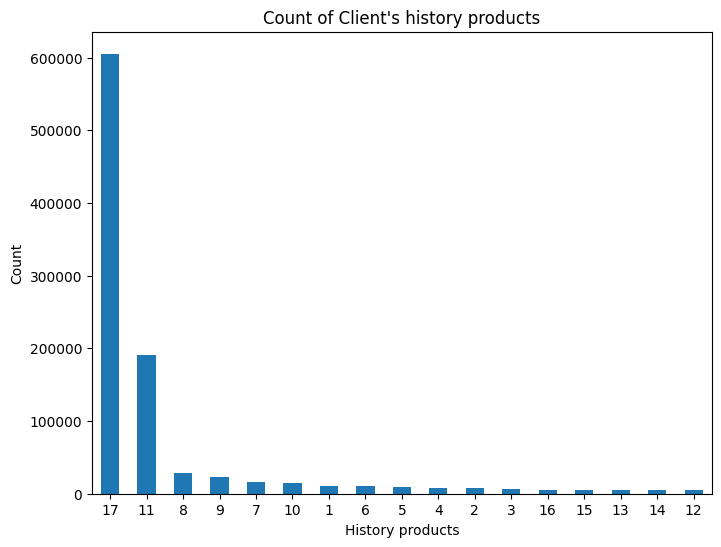

In [15]:
# Count the occurrences of each value in the column
value_counts = users_history_count['count'].sort_values(ascending=True).value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Count of Client\'s history products')
plt.xlabel('History products')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [16]:
print("""
Train:
Total Relationships: {train_total}
Unique Users: {train_users}
Unique Items: {train_items}

Test:
Total Relationships: {test_total}
Unique Users: {test_users}
""".format(
    train_total=len(train_data_transformed),
    train_users=len(train_data_transformed[COL_NCODPERS].unique()),
    train_items=len(train_data_transformed[COL_FINANCIAL_PRODS].unique()),
    test_total=len(test_data),
    test_users=len(test_data[COL_NCODPERS].unique()),
))


Train:
Total Relationships: 13647309
Unique Users: 956645
Unique Items: 12198

Test:
Total Relationships: 929615
Unique Users: 929615



### 3 Model Training

I'm going to establish a baseline in order to compare model iterations and check metrics progression.

For this use case, time dependency and order of products purchase matter. That's why it is needed a model capable of taking into account these features while finding similarities between user's interactions.  

First we need to store the values of the items to be able to process in numerical format for the trinaing part and then decode the numerical values to the string format. For this reason, it's necessary to map the values to the codes in first place.

In [30]:
def encode_categorical_to_integers(df, column_name):
    """
    Encodes the categorical values in a specific column of a DataFrame to integers.
    
    Parameters:
    - df: pandas DataFrame
    - column_name: The name of the column containing categorical values to encode
    
    Returns:
    - df: DataFrame with the column encoded to integers
    - mapping: A dictionary mapping the original categorical values to integers
    """
    # Generate a unique integer for each category
    mapping = {category: idx for idx, category in enumerate(df[column_name].unique())}
    
    # Apply the mapping to the column
    df[column_name + '_encoded'] = df[column_name].map(mapping)
    
    return df, mapping

# Encode the categorical values to integers
train_data_encoded, category_mapping = encode_categorical_to_integers(train_data_transformed, COL_FINANCIAL_PRODS)

In [31]:
train_data_encoded.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,financial_products,financial_products_encoded
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,ind_cco_fin_ult1,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,ind_cco_fin_ult1,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,ind_cco_fin_ult1,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,ind_deco_fin_ult1,1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,ind_cco_fin_ult1,0


In [33]:
from scipy.sparse import csr_matrix

train_data_preprocessed = train_data_transformed

# Convert timestamps to a numeric value (e.g., days since the first purchase)
train_data_preprocessed['days_since_first'] = (pd.to_datetime(train_data_preprocessed['fecha_dato'], format="%Y-%m-%d") - pd.to_datetime(train_data_preprocessed['fecha_dato'], format="%Y-%m-%d").min()).dt.days

# Create a weight based on recency
train_data_preprocessed['weight'] = 1 / (1 + train_data_preprocessed['days_since_first'])

# Create the user-item interaction matrix
user_item_matrix = csr_matrix((train_data_preprocessed['weight'], (train_data_preprocessed[COL_NCODPERS], train_data_preprocessed['financial_products_encoded']))).T.tocsr()


In [34]:
import implicit

# Initialize the ALS model
model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=2)

# Train the model using the user-item interaction matrix
model.fit(user_item_matrix)


/Users/ignacio.ojeda/Documents/MLOps/BankRecSys/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 2/2 [00:03<00:00,  1.53s/it]


In [39]:

def decode_integers_to_categorical(arr, mapping):
    """
    Decodes integers back to their original categorical values using the provided mapping.
    
    Parameters:
    - arr: numpy ndarray containing integer values
    - mapping: A dictionary mapping the original categorical values to integers
    
    Returns:
    - decoded_arr: numpy ndarray with the decoded categorical values
    """
    # Reverse the mapping to get integer -> category
    reverse_mapping = {v: k for k, v in mapping.items()}
    
    # Vectorized decoding using numpy's vectorize
    decode_func = np.vectorize(reverse_mapping.get)
    decoded_arr = decode_func(arr)
    
    return decoded_arr

    
# results = decode_integers_to_categorical(train_data_encoded, 'Category_encoded', category_mapping)
# print("\nDecoded DataFrame:")

In [38]:
client_id = 1234  # replace with the actual client ID
recommended = model.recommend(client_id, user_item_matrix[client_id], N=TOP_K)[0]
# print(type(recommended))
# print(recommended)
decoded_predictions = decode_integers_to_categorical(recommended, 'Category_encoded', category_mapping)

print(f"Top {TOP_K} recommended products:", decoded_predictions)
print(type(recommended))

<class 'numpy.ndarray'>


In [125]:
# Make recommendations for the first 1000 users in the dataset
userids = np.arange(1000)
ids, scores = model.recommend(userids, user_item_matrix[userids])
ids, ids.shape

(array([[1251704,  123946,  294364, ...,  486680,  295406,  122500],
        [1326272,  118355, 1089869, ..., 1165082, 1085929, 1357796],
        [1326272, 1256090, 1216083, ...,  118355, 1081899, 1374081],
        ...,
        [ 238776,  138265,  879088, ...,  811199,  200035, 1056094],
        [ 268183,  189173,  545776, ...,  238068,  520386,   20648],
        [ 207106,  680338,  202069, ...,  456219,   26206,  282807]],
       dtype=int32),
 (1000, 10))